#2010년도~2021년 혼인건수와 출생아수의 변화 살펴하기
**시간이 지날수록 출생아수의 변화가 있는가?**

#####1) 혼인건수가 가장 적은 년도와 가장 많은 년도는 언제인가?
#####2) 출생아수가 가장 적은 년도와 가장 많은 년도는 언제인가?
#####3) 출생아수가 혼인건수에 영향이 있는가?


###1.2010년도~2021년도 혼인건수와 출생아수 데이터 읽어오기

#####- URL(통계청):https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B8000G
#####- 조회설정 ######행정구역별:전국 ######종류별:출생아수(명), 혼인건수(건) ######시점: 2000년도~2021년도 ######그외:행렬전환


In [49]:
# pandas 라이브러리 가져오기

import pandas as pd

In [50]:
# 2000년_2021년 출생아수와 혼인건수.csv 화일 읽고 상위 5개 데이터 확인하기
# 변수명 = pd.read_csv(‘파일경로명’, encoding=‘인코딩방식’header=행번호)
# 인코딩방식 :EUC_KR(한글이 포함된 일반적인 경우)/cp949(MS office에서 저장한 파일 형식)
# header=행번호 : 열이름으로 사용할 행번호 설정

data = pd.read_csv("2000년_2021년 출생아수와 혼인건수.csv", encoding="EUC_KR", header=1)
data.head()

,시점,출생아수(명),혼인건수(건)
0,2000,640089,332090
1,2001,559934,318407
2,2002,496911,304877
3,2003,495036,302503
4,2004,476958,308598


###2.2010년도~2021년도 혼인건수와 출생아수 데이터 확인하기


In [51]:
# 데이터 정보 확인(행열개수, 데이터 타입, 열의 개수 등)하기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   시점       22 non-null     int64
 1   출생아수(명)  22 non-null     int64
 2   혼인건수(건)  22 non-null     int64
dtypes: int64(3)
memory usage: 660.0 bytes


In [52]:
# 수치형 데이터에 대한 통계자료(평균, 최대, 최소등..) 확인하기
data.describe(include="all")

,시점,출생아수(명),혼인건수(건)
count,22.000000,22.000000,22.000000
mean,2010.500000,437712.000000,297942.363636
std,6.493587,89917.017497,40377.388552
min,2000.000000,260562.000000,192507.000000
25%,2005.250000,413541.000000,286852.000000
50%,2010.500000,448304.000000,309178.500000
75%,2015.750000,482652.000000,326830.750000
max,2021.000000,640089.000000,343559.000000


In [53]:
# 하위 10개 데이터 확인하기
data.tail(10)

,시점,출생아수(명),혼인건수(건)
12,2012,484550,327073
13,2013,436455,322807
14,2014,435435,305507
15,2015,438420,302828
16,2016,406243,281635
17,2017,357771,264455
18,2018,326822,257622
19,2019,302676,239159
20,2020,272337,213502
21,2021,260562,192507


###3.혼인건수와 출생아수 데이터 재정리하기


In [54]:
# 열이름 변경하기
# 변수명.rename(columns = {‘열이름’:‘새로운 열이름’}, inplace= True)
# 출생아수(명)->출생아수
# 혼인건수(건)->혼인건수
data.rename(
    columns={"출생아수(명)": "출생아수", "혼인건수(건)": "혼인건수"}, inplace=True
)

In [55]:
# 2010년도~2021년도 데이터 행 찾기
data.query("2010 <= 시점 <= 2021")

,시점,출생아수,혼인건수
10,2010,470171,326104
11,2011,471265,329087
12,2012,484550,327073
13,2013,436455,322807
14,2014,435435,305507
15,2015,438420,302828
16,2016,406243,281635
17,2017,357771,264455
18,2018,326822,257622
19,2019,302676,239159


In [56]:
# 2010년도~2021년도 데이터 행 저장하기

numData = data.query("2010 <= 시점 <= 2021")

In [57]:
# 2010년이 10번째 행임으로 index 정리하고 확인하기
# 변수명.reset_index(drop=True, inplace=True)
numData.reset_index(drop=True, inplace=True)
numData

,시점,출생아수,혼인건수
0,2010,470171,326104
1,2011,471265,329087
2,2012,484550,327073
3,2013,436455,322807
4,2014,435435,305507
5,2015,438420,302828
6,2016,406243,281635
7,2017,357771,264455
8,2018,326822,257622
9,2019,302676,239159


###4.시각적으로 분석하며 질문에 답하기


####1)한글 지원하기


In [58]:
#차트에 한글 지원하기
!pip install koreanize-matplotlib
import koreanize_matplotlib

####2)차트를 생성하기 위한 라이브러리 읽어오기


In [59]:
import matplotlib.pyplot as plt
import numpy as np

####3) 혼인건수가 가장 적은 년도와 가장 많은 년도는 언제인가?


In [60]:
# 년도에 따른 혼인건수를 plot차트로 생성하기
# plt.plot(y축데이터)
# plt.show()

In [61]:
# x축의 눈금값이 모두 나타나도록 차트 수정하기

# plt.xticks(range(눈금값), 레이블)
# - 눈금값: x, y 축 눈금에 표시할 눈금(range(), numpy.arrange())
# - 레이블: 눈금값으로 표시할 레이블로 튜플이나 리스트로 설정


plt.show()

####4) 출생아수가 가장 적은 년도와 가장 많은 년도는 언제인가?


In [62]:
# 년도에 따른 혼인건수를 plot차트로 생성하기
# plt.plot(y축데이터)
# y축데이터: 출생아수


plt.show()

####5) 출생아수가 혼인건수에 영향이 있는가?


In [63]:
##년도에 따른 혼인건수와 출생아수를 하나의 plot차트로 생성하기(범례 삽입)
# plt.plot(y축데이터, label='범례이름')
# label='범례이름': plot 차트 선의 이름
# plt.legend(): 범례를 차트내에 표시


plt.show()

####6) 차트 꾸며보기


In [64]:
# 모든 차트에 marker 추가하고 '출생아수' 차트의 markersize 조절하기
# marker='마커종류': 선 위에 표현할 마커 모양 설정
# markersize=정수: 마커의 크기 변경


plt.show()

In [65]:
# 모든 차트에 linestyle 추가하고 출생아수 차트의 선두께 조절하기
# linestyle='선종류': 선의 모양 설정
# linewidth=정수: 선 두께 설정


plt.show()

In [66]:
# 차트 색상 변경하기
# color='색상': 선 색상 설정


plt.show()

In [67]:
# 혼인건수 차트의 색상, 마커, 선종류를 약식으로 표현해보기
#'ro:' : color='r', marker='o', linestyle='-'


plt.show()

In [68]:
# 차트제목, XY 레이블, grid 지정해보기
# plt.title('차트제목') :지정한 차트제목을 차트 중앙 상단에 표시
# plt.xlabel('x축제목'), plt.ylabel('y축제목') : x축과 y축의 제목을 지정한 문자열로 설정
# plt.ylim(처음값, 마지막값)
# plt.grid() : 차트내에 눈금선 표시


plt.show()

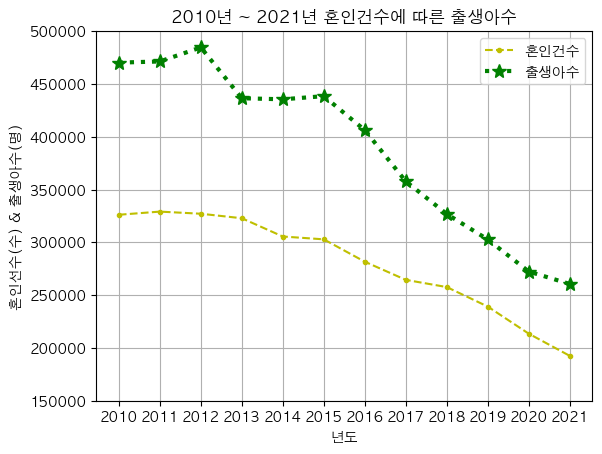

In [ ]:
plt.plot(numData["혼인건수"], "y.--", label="혼인건수")
plt.plot(
    numData["출생아수"],
    label="출생아수",
    marker="*",
    markersize="10",
    linestyle=":",
    linewidth=3,
    color="g",
)
plt.legend()
plt.xticks(range(len(numData["시점"])), numData["시점"])
plt.rc("font", family="AppleGothic")
plt.title("2010년 ~ 2021년 혼인건수에 따른 출생아수")
plt.xlabel("년도")
plt.ylabel("혼인선수(수) & 출생아수(명)")
plt.ylim(150000, 500000)
plt.grid()
plt.show()